<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

**Above** is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df = pd.read_csv("insurance_data.csv")   # make sure the CSV is in the same folder
print("✅ Data Loaded Successfully!\n")
print(df.head())

✅ Data Loaded Successfully!

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


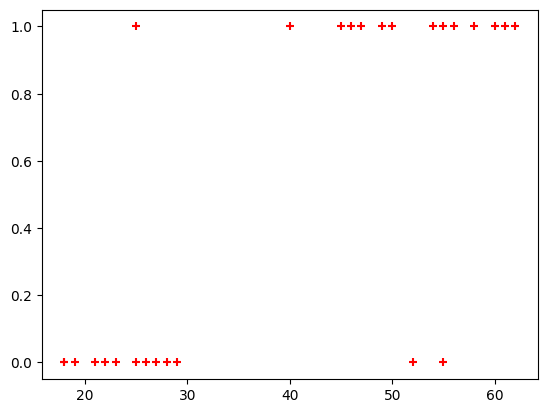

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
print("\nMissing values in each column:\n", df.isna().sum())




Missing values in each column:
 age                 0
bought_insurance    0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['age']]                # feature
y = df['bought_insurance']     # target


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n✅ Data split into training and test sets.")



✅ Data split into training and test sets.


In [11]:
X_test

,age
25,54
12,27
6,55
15,55
20,21
5,56


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)
print("\n✅ Model trained successfully!")


✅ Model trained successfully!


In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



📊 Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6


Confusion Matrix:
[[3 0]
 [3 0]]


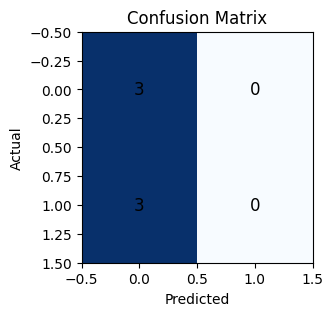

In [17]:
y_pred = model.predict(X_test_scaled)

print("\n📊 Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, f"{val}", ha='center', va='center', fontsize=12)
plt.show()

In [18]:
X_test

,age
25,54
12,27
6,55
15,55
20,21
5,56


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


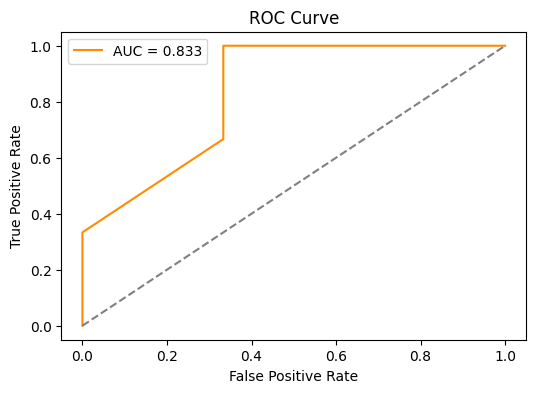


ROC AUC Score: 0.833


In [19]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color='darkorange')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"\nROC AUC Score: {roc_auc:.3f}")


In [20]:
y_predicted = model.predict(X_test)

In [21]:
cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
print("\n✅ 5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))



✅ 5-Fold Cross-Validation Accuracy Scores: [0.83333333 0.83333333 1.         0.6        1.        ]
Mean CV Accuracy: 0.8533


In [23]:
model.predict_proba(X_test)

array([[0.20299291, 0.79700709],
       [0.53312626, 0.46687374],
       [0.19415062, 0.80584938],
       [0.19415062, 0.80584938],
       [0.61446497, 0.38553503],
       [0.1856038 , 0.8143962 ]])

In [24]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced'),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("\n🎯 Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation Score:", round(grid.best_score_, 4))


🎯 Best Hyperparameters: {'C': 0.01}
Best Cross-Validation Score: 0.91


In [25]:
model.score(X_test,y_test)

0.8333333333333334

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


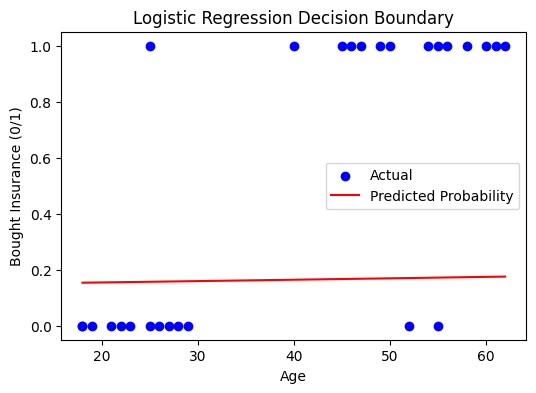

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['bought_insurance'], color='blue', label='Actual')
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0/1)')
plt.title('Logistic Regression Decision Boundary')

ages = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
ages_scaled = scaler.transform(ages)
probs = model.predict_proba(ages_scaled)[:, 1]
plt.plot(ages, probs, color='red', label='Predicted Probability')
plt.legend()
plt.show()


In [27]:
y_predicted

array([1, 0, 1, 1, 0, 1])

In [28]:
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and Scaler saved successfully as 'logistic_model.pkl' and 'scaler.pkl'.")


✅ Model and Scaler saved successfully as 'logistic_model.pkl' and 'scaler.pkl'.


In [29]:
X_test

,age
25,54
12,27
6,55
15,55
20,21
5,56


In [31]:
age_input = float(input("Enter an age to predict (e.g., 35): "))
age_scaled = scaler.transform(pd.DataFrame({'age': [age_input]}))
prediction = model.predict(pd.DataFrame(age_scaled, columns=['age']))[0]
probability = model.predict_proba(pd.DataFrame(age_scaled, columns=['age']))[0][1]

print(f"\nPrediction for Age {age_input}: {'Buys Insurance' if prediction == 1 else 'Does NOT Buy Insurance'}")
print(f"Probability of buying insurance: {probability:.2f}")

Enter an age to predict (e.g., 35): 20

Prediction for Age 20.0: Does NOT Buy Insurance
Probability of buying insurance: 0.15


**model.coef_ indicates value of m in y=m*x + b equation**

In [32]:
model.coef_

array([[0.05557007]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [33]:
model.intercept_

array([-1.6330914])

**Lets defined sigmoid function now and do the math with hand**

In [34]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [35]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [36]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**
**0.485 is more than 0.5 which means person with 43 will buy the insurance**

In [37]:
age = 43
prediction_function(age)

0.568565299077705

✅ Data Loaded Successfully!

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None

Missing values:
 age                 0
bought_insurance    0
dtype: int64

✅ Data split into Training and Test sets.

✅ Logistic Regression model trained successfully!

📊 Classification Report (Test Data):

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.

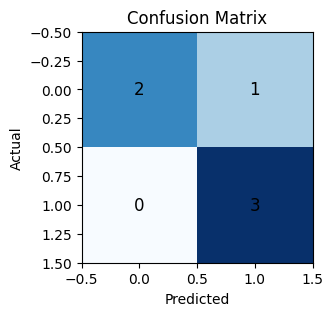

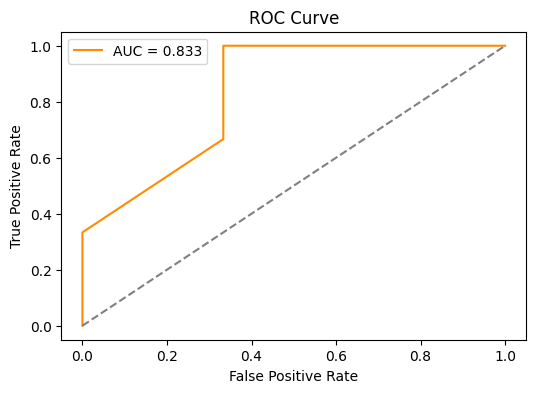


ROC AUC Score: 0.833

✅ 5-Fold Cross-Validation Accuracy Scores: [0.83333333 0.83333333 1.         0.6        1.        ]
Mean CV Accuracy: 0.8533

🎯 Best Hyperparameters: {'C': 0.01}
Best Cross-Validation Score: 0.91


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


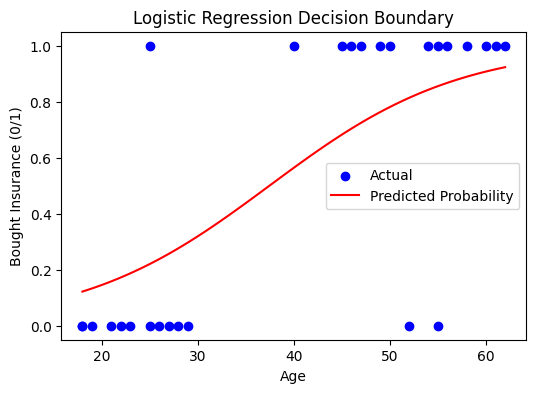


✅ Model and Scaler saved successfully as 'logistic_model.pkl' and 'scaler.pkl'.

Enter an age to predict (e.g., 35): 20

Prediction for Age 20: Does NOT Buy Insurance
Probability of buying insurance: 0.15


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
# ----------------------------------------------------
# LOGISTIC REGRESSION - INSURANCE DATASET (FINAL CODE)
# ----------------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib

# ----------------------------------------------------
# Step 2: Load the dataset
df = pd.read_csv("insurance_data.csv")  # ensure it's in the same folder
print("✅ Data Loaded Successfully!\n")
print(df.head())

# ----------------------------------------------------
# Step 3: Check dataset info
print("\n📊 Dataset Information:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# ----------------------------------------------------
# Step 4: Define feature (X) and target (y)
X = df[['age']]
y = df['bought_insurance']

# ----------------------------------------------------
# Step 5: Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n✅ Data split into Training and Test sets.")

# ----------------------------------------------------
# Step 6: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# Step 7: Train Logistic Regression with class balancing
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
print("\n✅ Logistic Regression model trained successfully!")

# ----------------------------------------------------
# Step 8: Model Evaluation on Test Data
y_pred = model.predict(X_test_scaled)

print("\n📊 Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, f"{val}", ha='center', va='center', fontsize=12)
plt.show()

# ----------------------------------------------------
# Step 9: ROC Curve and AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color='darkorange')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"\nROC AUC Score: {roc_auc:.3f}")

# ----------------------------------------------------
# Step 10: Cross-Validation (Accuracy)
cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
print("\n✅ 5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))

# ----------------------------------------------------
# Step 11: Hyperparameter Tuning (GridSearch)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced'),
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("\n🎯 Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation Score:", round(grid.best_score_, 4))

# ----------------------------------------------------
# Step 12: Visualize Logistic Regression Decision Boundary
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['bought_insurance'], color='blue', label='Actual')
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0/1)')
plt.title('Logistic Regression Decision Boundary')

ages = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
ages_scaled = scaler.transform(ages)
probs = model.predict_proba(ages_scaled)[:, 1]
plt.plot(ages, probs, color='red', label='Predicted Probability')
plt.legend()
plt.show()

# ----------------------------------------------------
# Step 13: Save model and scaler for future predictions
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and Scaler saved successfully as 'logistic_model.pkl' and 'scaler.pkl'.")

# ----------------------------------------------------
# Step 14: Make new predictions
try:
    age = int(input("\nEnter an age to predict (e.g., 35): "))
    age_scaled = scaler.transform([[age]])
    pred = model.predict(age_scaled)
    prob = model.predict_proba(age_scaled)[0][1]
    print(f"\nPrediction for Age {age}: {'Buys Insurance' if pred[0]==1 else 'Does NOT Buy Insurance'}")
    print(f"Probability of buying insurance: {prob:.2f}")
except:
    print("\nSkipping manual prediction input (non-interactive environment).")


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model